# Numerik

In [1]:
%pylab inline

from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


In [2]:
# set default values for plotting:
rcParams['axes.titlesize']  = 14
rcParams['axes.labelsize']  = 14
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['legend.fontsize'] = 12
rcParams['lines.linewidth'] = 2

## Finite Differenzen

Literatur:

- Farlow, Part 5, Lessons 37, 38
- MacCluer, Chapter 12
- Logan, Chapter 6, Sections 1 - 3


## Crank-Nicolson

Literatur:

- MacCluer, Chapter 12
- Farlow, Part 5, Lesson 39
- Logan, Chapter 6, Section 4


## Galerkin und  Finite Elemente

Literatur:

- MacCluer, Chapter 13

### Aufgabe 1: Laplacegleichung

$u_{xx} + u_{yy}=0$

- $y$-Achse $\downarrow$  mit $M$ Stützstellen und Index $m$
- $x$-Achse $\rightarrow$ mit $N$ Stützstellen und Index $n$

In [3]:
M = 40
N = 80

u = zeros((M,N))

case = "electric" # zwei elektrische Ladungen
case = "thermal"  # thermische Randbedingungen

if case == "electric": 
    u[3*M//4,   N//4] = -1
    u[  M//4, 3*N//4] = +1
elif case == "thermal":
    u[:,0]  = 1  # linke Randbedingung
    u[:,-1] = 2  # rechte Randbedingung
    u[0,:]  = 3  # obere Randbedingung
    u[-1,:] = 4  # untere Randbedingung
    
    
def iteration(u):
    for m in range(1, M-1):
        for n in range(1, N-1):
            u[m,n] = 0.25*(u[m+1,n] + u[m-1,n] + u[m,n+1] + u[m,n-1])
            if case == "electric":
                u[3*M//4,   N//4] = -1
                u[  M//4, 3*N//4] = +1
    return u

# u

In [4]:
iterations = 300
for i in range(iterations):
    u = iteration(u)

v = u.copy()
err = iteration(v) - u
abs(err).max()  

0.005600289574479778

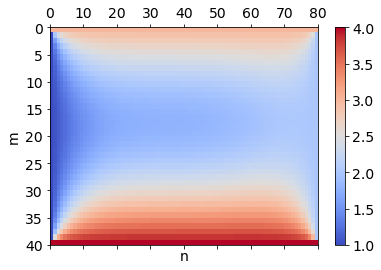

In [5]:
fig, ax = subplots(figsize=(6,4))
cax = ax.matshow(u, extent=(0, N, M, 0), aspect='auto', cmap=cm.coolwarm) 
                  # extent = (left, right, bottom, top)
# alternativer Befehl imshow:    
#cax = ax.imshow(u, extent=(0, N, M, 0), aspect='auto', cmap=cm.coolwarm)    
fig.colorbar(cax)
xlabel('n')
ylabel('m')
grid(False)

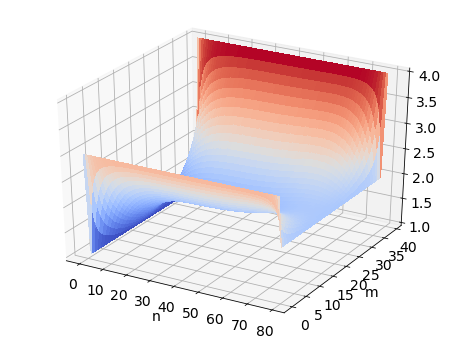

In [6]:
from mpl_toolkits.mplot3d import Axes3D

x = arange(N)
y = np.arange(M)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)
# ax.view_init(azim = -90,elev = 30)
xlabel('n')
ylabel('m')
grid(False)

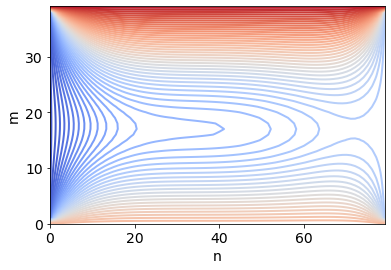

In [7]:
# 50 Konturlinien:
contour(u, 50, cmap=cm.coolwarm) 
xlabel('n')
ylabel('m')
grid(False)

### Aufgabe 2: Wärmeleitungsgleichung

$u_t = \alpha u_{xx}$,  $0\leq x \leq L$,  $0\leq t \leq T$,

- $t$-Achse $\downarrow$  mit Schrittweite $k$ und Index $m$, $M$ Stützstellen
- $x$-Achse $\rightarrow$ mit Schrittweite $h$ und Index $n$, $N$ Stützstellen


Aufgaben:

- Implementieren Sie eine explizite numerische Lösung.
- Überprüfen Sie durch Variationen der Parameter die Stabilitätsbedingung $\frac{\alpha k}{h^2} \leq \frac{1}{2}$.
- Implementieren Sie zeitlich variierende Randbedingungen.
- Implementieren Sie einen Wärmetransfer am rechten Ende.

In [8]:
a = 0.3   # alpha der Wärmeleitungsgleichung
T = 15    # zeitliche Spanne
L = 2     # räumliche Spanne

M = 5000  # Anzahl Stützstellen für Zeit
N = 30    # Anzahl Stützstellen für Raum

k = T/(M - 1)  # Schrittweite für Zeit
h = L/(N - 1)  # Schrittweite für Raum

print("Stabilitätsbedingung:", a*k/h**2)

t = linspace(0, T, M)
x = linspace(0, L, N)

# u(t, x):
u = zeros((M, N)) # Initalisierungmit Nullen
u[0,:] = 0       # Anfangsbedingung für t=0

# linke Randbedingung bei x=0 für alle Zeiten:
u[:,0] = 0      
# u[:,0] = linspace(1,0,M)

# rechte Randbedingung bei x=L für alle Zeiten:
u[:,-1] = 1
# u[:,-1] = sin(t)

# Kontakt-Aussentemperatur rechts bei x=L:
lbd = 1
g = 1*ones_like(t)
g = 1*sin(t)
#g = t/T

# u

Stabilitätsbedingung: 0.1892628525705141


In [9]:
for m in range(0, M-1):
    for n in range(1,N-1):
        u[m+1,n] = u[m,n] + a*k/h**2*(u[m,n-1] - 2*u[m,n] + u[m,n+1])
        # for contact temperature include:
        # u[m+1,N-1] = (u[m+1,N-2] + h*lbd*g[m+1])/(1 + h*lbd)

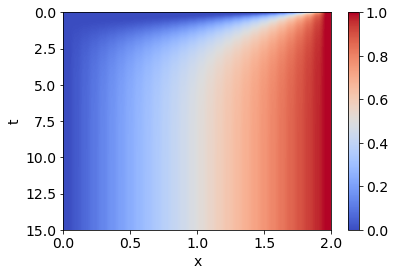

In [10]:
fig, ax = subplots(figsize=(6,4))
cax = ax.imshow(u, extent=(0, L, T, 0), aspect='auto', cmap=cm.coolwarm) 
                 # extent = (left, right, bottom, top)
fig.colorbar(cax)
xlabel('x')
ylabel('t')
grid(False)

In [11]:
# Interaktive Darstellung: 
# https://github.com/ipython/ipywidgets
# Evtl. jupyter nbextension enable --py --sys-prefix widgetsnbextension im Command Window ausführen.

def my_f(t):
    figure(figsize=(6,3))
    m = t/k  # t = m*k
    m = int(m)
    plot(x, u[m,:],'.-')
    xlabel('x')
    xlim((0, L))
    ylim((-1.2, 1.2))
    grid(True)

interact(my_f, t=(0, T, k));

interactive(children=(FloatSlider(value=6.997399479895979, description='t', max=15.0, step=0.00300060012002400…

### Aufgabe 3: Crank-Nicolson, Wärmeleitungsgleichung

Literatur: MacCluer, Chapter 12, 238 ff.

In [12]:
a = 0.3   # alpha 
T = 5
L = 2

M = 100
N = 30

k = T/(M-1)
h = L/(N-1)

r = a*k/h**2
print("r =", r)

u = zeros((M, N))
u[0,:]  = 0    # Anfangsbedingung
u[:,0]  = 0    # linke Randbedingung
u[:,-1] = 1    # rechte Randbedingung

r = 3.1856060606060606


In [13]:
v = concatenate(([0], ones(N - 2)))
w = concatenate((ones(N - 2), [0]))
d = concatenate(([0], ones(N - 2), [0]))

R = -2*diag(d) + diag(v, 1) + diag(w, -1)
I = eye(N, N)

In [14]:
A = I - r/2*R
for m in range(0, M-1):
    b = dot(I + r/2*R, u[m,:])
    u[m + 1,:] = solve(A, b)

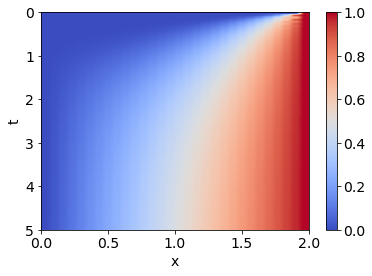

In [15]:
fig, ax = subplots(figsize=(6,4))
cax = ax.imshow(u, extent=(0, L, T, 0), aspect='auto', cmap=cm.coolwarm)
# extent = (left, right, bottom, top)
fig.colorbar(cax)
xlabel('x')
ylabel('t')
grid(False)

In [16]:
def my_f(m):
    figure(figsize=(6,3))
    plot(u[m,:],'.-')
    xlabel('n')
    xlim((0, N-1))
    ylim((-1.2, 1.2))            
    grid(True)

interact(my_f, m=(0, M-1, 1)); 

interactive(children=(IntSlider(value=49, description='m', max=99), Output()), _dom_classes=('widget-interact'…

### Aufgabe 4: Laplacegleichung

Wir betrachten die Laplacegleichung $u_{xx} + u_{yy}=0$ mit 

- $y$-Achse $\downarrow$  mit $M$ Stützstellen, Index $m$ und Schrittweite $k$
- $x$-Achse $\rightarrow$ mit $N$ Stützstellen, Index $n$ und Schrittweite $h$

und interpretieren $u(x,y)$ als stationäre Temperaturverteilung in einem 2-dimensionalen Raumgebiet.

1. Implementieren Sie die explizite Methode der finiten Differenzen für unterschiedliche Schrittweiten $h$ und $k$.
2. Lösen Sie damit die Laplacegleichung in einem quadratischen $x$-$y$-Gebiet mit den folgenden Randbedingungen: 

    + am linken  Rand ist $u$ immer gleich 1
    + am rechten Rand ist $u$ immer gleich 2
    + am oberen  Rand ist $u$ immer gleich 3
    + am unteren Rand ist $u$ immer gleich 0

3. Berechnen Sie mit der central difference approximation den Wärmefluss (unter der Annahme, dass die therm. Konduktivität $K=1$) und stellen Sie diesen gemeinsam mit der Temperaturverteilung dar. *Hinweis:* Verwenden Sie für die Darstellung des Wärmeflusses die Funktion `quiver` oder die Funktion `streamplot`.

**Lösung:**

In [3]:
M = 40
N = 80

h = 0.1
k = 0.2
x = linspace(0, N*h, N)
y = linspace(0, M*k, M)

u = zeros((M, N))

# Randbedingungen:
u[:,0]  = 1  # linke Randbedingung
u[:,-1] = 2  # rechte Randbedingung
u[0,:]  = 3  # obere Randbedingung
#u[-1,:] = 4  # untere Randbedingung

def iteration(u):
    for m in range(1, M-1):
        for n in range(1, N-1):
            u[m,n] = k**2/(2*k**2 + 2*h**2)*(u[m  ,n+1] + u[m  ,n-1]) + \
                     h**2/(2*k**2 + 2*h**2)*(u[m+1,n  ] + u[m-1,n  ])
    return u

In [4]:
iterations = 500
for i in range(iterations):
    u = iteration(u)

v = u.copy()
err = iteration(v) - u
abs(err).max()  

0.0017676432948432463

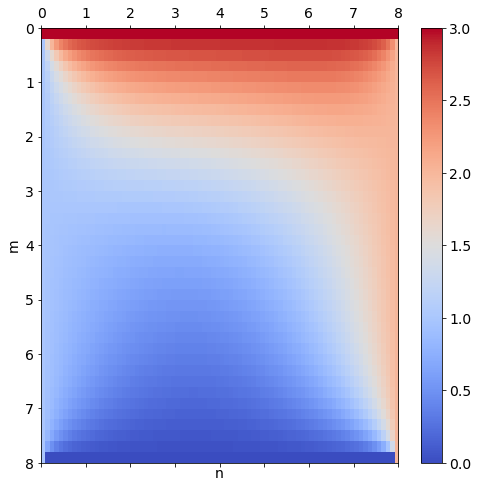

In [5]:
fig, ax = subplots(figsize=(8,8))
cax = ax.matshow(u, extent=(0, N*h, M*k, 0), aspect='auto', cmap=cm.coolwarm) 
                  # extent = (left, right, bottom, top)
fig.colorbar(cax)
xlabel('n')
ylabel('m')
grid(False)

In [6]:
u_x = zeros((M, N))
u_y = zeros((M, N))

for m in range(1, M-1):
        for n in range(1, N-1):
            u_x[m,n] = 1/(2*h)*( u[m  ,n+1] - u[m  ,n-1] )
            u_y[m,n] = 1/(2*k)*( u[m+1,n  ] - u[m-1,n  ] )

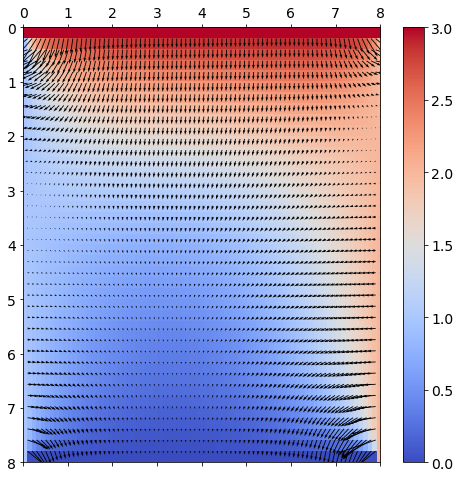

In [7]:
X, Y = np.meshgrid(x, y)

fig, ax = subplots(figsize=(8,8))
cax = ax.matshow(u, extent=(0, N*h, M*k, 0), aspect='auto', cmap=cm.coolwarm) 
fig.colorbar(cax)
quiver(X, Y, -u_x, u_y, scale=30)
grid(False)

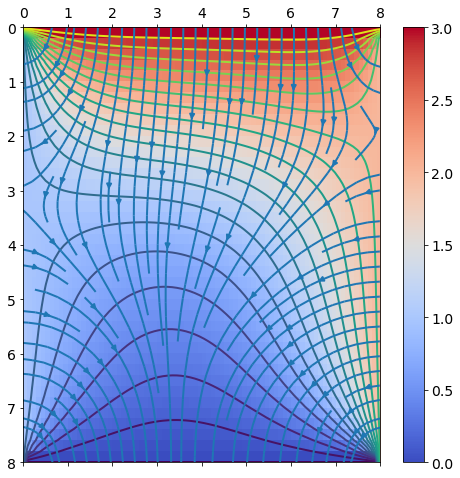

In [8]:
fig, ax = subplots(figsize=(8,8))
cax = ax.matshow(u, extent=(0, N*h, M*k, 0), aspect='auto', cmap=cm.coolwarm) 
fig.colorbar(cax)
contour(X, Y, u, 20)
#quiver(X, Y, -u_x, u_y, scale=30)
streamplot(X, Y, -u_x, -u_y);

### Aufgabe 5: Wärmeleitungsgleichung

Wir betrachten die Wärmeleitungsgleichung $u_{t}=u_{xx}$ für $0 \leq x \leq 1$ und $0 \leq t$ mit den Rand- und Anfangsbedingungen

- $u(0,t) = u(1,t) = 0$
- $u(x,0) = \sin(\pi x)$

1. Lösen Sie das Problem analytisch.
2. Lösen Sie das Problem numerisch mit der expliziten Methode der finiten Differenzen an den Stützstellen $x=0, 0.1, 0.2, \ldots, 0.9, 1$ und $t=0, 0.005, 0.010, 0.015$.
3. Vergleichen Sie Ihre numerisches Ergebnis mit den analytischen bei $t=0.015$.

**Lösung:**

In [9]:
h = 0.1
# x = frange(0, 1, delta=h)
x = arange(0, 1 + h, step=h)

k = 0.005
T = 0.015
# t = frange(0, T, delta=k)
t = arange(0, T, step=k)

In [10]:
a = 1   # alpha der Wärmeleitungsgleichung

M = len(t)  # Anzahl Stützstellen für Zeit
N = len(x)    # Anzahl Stützstellen für Raum

print("Stabilitätsbedingung:", a*k/h**2)
N

Stabilitätsbedingung: 0.4999999999999999


11

In [11]:
# u(t, x):
u = zeros((M, N))    # Initalisierungmit Nullen
u[0, :] = sin(pi*x)  # Anfangsbedingung für t=0

for m in range(0, M-1):
    for n in range(1,N-1):
        u[m+1,n] = u[m,n] + a*k/h**2*(u[m,n-1] - 2*u[m,n] + u[m,n+1])

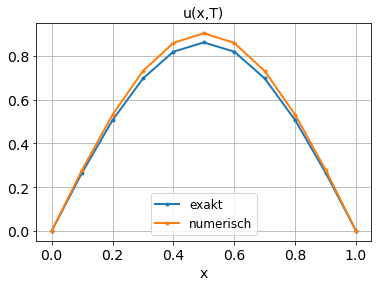

In [12]:
u_T = exp(-pi**2*T)*sin(pi*x)

plot(x, u_T    , '.-', label='exakt')
plot(x, u[-1,:], '.-', label='numerisch')
title('u(x,T)')
xlabel("x")
legend()
grid(True)

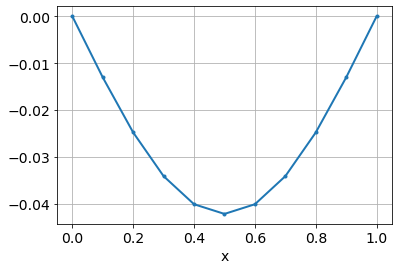

In [13]:
error = u_T - u[-1,:]
plot(x, error, '.-')
xlabel("x")
grid(True)